In [5]:
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import timezone
from vizualization import Graph
import time
import pandas as pd
import requests as re
import warnings
warnings.filterwarnings("ignore")

In [6]:
#голубые фишки
blueChipsStocks = [
    'SBER','GAZP','ALRS','GMKN','LKOH', \
    'MGNT','NVTK','PHOR','PLZL','POLY', \
    'ROSN','SNGS','TATN','TCSG',"YNDX"
]

#Все инструменты доступные в algopack 2023-12-9
allStocks = [
    'ABIO','ABRD','AFKS','AFLT','AGRO','AKRN','ALRS','AMEZ','APTK','AQUA', \
    'ARSA','ASSB','ASTR','AVAN','BANE','BANEP','BELU','BISVP','BLNG','BRZL', \
    'BSPB','BSPBP','CARM','CBOM','CHGZ','CHKZ','CHMF','CHMK','CIAN','CNTL', \
    'CNTLP','DIOD','DSKY','DVEC','DZRD','DZRDP','EELT','ELFV','ENPG','ETLN', \
    'FEES','FESH','FIVE','FIXP','FLOT','GAZA','GAZAP','GAZP','GCHE','GECO',\
    'GEMA','GEMC','GLTR','GMKN','GTRK','HHRU','HIMCP','HMSG','HNFG','HYDR',\
    'IGST','IGSTP','INGR','IRAO','IRKT','JNOS','JNOSP','KAZT','KAZTP','KBSB',\
    'KCHE','KCHEP','KGKC','KGKCP','KLSB','KMAZ','KMEZ','KOGK','KRKN','KRKNP',\
    'KRKOP','KROT','KROTP','KRSB','KRSBP','KTSB','KTSBP','KUBE','KUZB','KZOS',\
    'KZOSP','LENT','LIFE','LKOH','LNZL','LNZLP','LSNG','LSNGP','LSRG','LVHK',\
    'MAGE','MAGEP','MAGN','MDMG','MFGS','MFGSP','MGNT','MGTS','MGTSP','MISB',\
    'MISBP','MOEX','MRKC','MRKK','MRKP','MRKS','MRKU','MRKV','MRKY','MRKZ',\
    'MRSB','MSNG','MSRS','MSTT','MTLR','MTLRP','MTSS','MVID','NAUK','NFAZ',\
    'NKHP','NKNC','NKNCP','NKSH','NLMK','NMTP','NNSB','NNSBP','NSVZ','NVTK',\
    'OGKB','OKEY','OMZZP','OZON','PAZA','PHOR','PIKK','PLZL','PMSB','PMSBP',\
    'POLY','POSI','PRFN','PRMB','QIWI','RASP','RBCM','RDRB','RENI','RGSS',\
    'RKKE','RNFT','ROLO','ROSB','ROSN','ROST','RTGZ','RTKM','RTKMP','RTSB',\
    'RTSBP','RUAL','RUSI','RZSB','SAGO','SAGOP','SARE','SAREP','SBER','SBERP',\
    'SELG','SFIN','SGZH','SIBN','SLEN','SMLT','SNGS','SNGSP','SOFL','SPBE','STSB',\
    'STSBP','SVAV','SVET','TASB','TASBP','TATN','TATNP','TCSG','TGKA','TGKB',\
    'TGKBP','TGKN','TNSE','TORS','TORSP','TRMK','TRNFP','TTLK','TUZA','UKUZ',\
    'UNAC','UNKL','UPRO','URKZ','USBN','UTAR','VEON-RX','VGSB','VGSBP','VJGZ',\
    'VJGZP','VKCO','VLHZ','VRSB','VRSBP','VSMO','VSYD','VSYDP','VTBR','WTCM',\
    'WTCMP','WUSH','YAKG','YKEN','YKENP','YNDX','YRSB','YRSBP','ZILL','ZVEZ'
]

In [7]:
tradeStatsColumn = [
    'tradedate','tradetime','secid','pr_open','pr_high','pr_low', \
    'pr_close','pr_std','vol','val','trades','pr_vwap','pr_change', \
    'trades_b','trades_s','val_b','val_s','vol_b','vol_s','disb', \
    'pr_vwap_b','pr_vwap_s','SYSTIME' \
]
 
orderStatsColumn = [
    'tradedate','tradetime','secid','put_orders_b','put_orders_s',\
    'put_val_b','put_val_s','put_vol_b','put_vol_s','put_vwap_b',\
    'put_vwap_s','put_vol','put_val','put_orders','cancel_orders_b',\
    'cancel_orders_s','cancel_val_b','cancel_val_s','cancel_vol_b', \
    'cancel_vol_s','cancel_vwap_b','cancel_vwap_s','cancel_vol',\
    'cancel_val','cancel_orders','SYSTIME'
]

obStatsColumn = [
    'tradedate','tradetime','secid','spread_bbo','spread_lv10','spread_1mio', \
    'levels_b','levels_s','ob_vol_b','ob_vol_s','ob_val_b','ob_val_s','imbalance_vol_bbo', \
    'imbalance_val_bbo','imbalance_vol','imbalance_val','vwap_b','vwap_s', \
    'vwap_b_1mio','vwap_s_1mio','SYSTIME'
]

In [8]:
#Слияние 3 потоков в 1 поток SuperCandels
def getSuperCandles(ticker,start_data,end_data,pandas_data=True):
    null = None
    tradeStatsUrl = f'https://iss.moex.com/iss/datashop/algopack/eq/tradestats/{ticker}.json?from={start_data}&till={end_data}'
    orderStatsUrl = f'https://iss.moex.com/iss/datashop/algopack/eq/orderstats/{ticker}.json?from={start_data}&till={end_data}'
    obStatsUrl = f'https://iss.moex.com/iss/datashop/algopack/eq/obstats/{ticker}.json?from={start_data}&till={end_data}'
    responseTradeStats = eval(re.get(tradeStatsUrl).text)
    time.sleep(2)
    responseOrderStats = eval(re.get(orderStatsUrl).text)
    time.sleep(2)
    responseObStats = eval(re.get(obStatsUrl).text)
    time.sleep(2)
    result = dict()
    result['tradeStats'] = dict()
    result['orderStats'] = dict()
    result['obStats'] = dict()
    for data in responseTradeStats['data']['data']:
        result['tradeStats'][data[0]+' '+data[1]] = [data[i] for i in range(3,len(data)-1)]
    for data in responseOrderStats['data']['data']:
        result['orderStats'][data[0]+' '+data[1]] = [data[i] for i in range(3,len(data)-1)]
    for data in responseObStats['data']['data']:
        result['obStats'][data[0]+' '+data[1]] = [data[i] for i in range(3,len(data)-1)]
    timeKeys = []
    for key in result.keys():
        timeKeys = timeKeys + list(result[key].keys())
    timeKeys = list(set(timeKeys))
    timeKeys.sort()
    resultData = []
    for key in timeKeys:
        try:
            tradeStats = result['tradeStats'][key]
        except:
            tradeStats = [None for i in range(3,len(tradeStatsColumn)-1)]
        try:
            orderStats = result['orderStats'][key]
        except:
            orderStats = [None for i in range(3,len(orderStatsColumn)-1)]
        try:
            obStats = result['obStats'][key]
        except:
            obStats = [None for i in range(3,len(obStatsColumn)-1)]
        data = list()
        data = [key,ticker] + tradeStats + orderStats + obStats
        resultData.append(data)
    ts = [tradeStatsColumn[i] for i in range(3,len(tradeStatsColumn)-1)]
    os = [orderStatsColumn[i] for i in range(3,len(orderStatsColumn)-1)]
    obs = [obStatsColumn[i] for i in range(3,len(obStatsColumn)-1)]
    columns = ['datatime','symbol'] + ts + os + obs
    if pandas_data:
        df = pd.DataFrame(resultData,columns=columns)
        df = df.set_index('datatime')
        df.index = pd.to_datetime(df.index)
        return  df , columns
    else:
        return resultData , columns

In [9]:
#Функция загрузки  дипазано данных
def getRangeSuperCandles(ticker,minData):
    delta = timedelta(days=7)
    delta2 = timedelta(days=1)
    current_dateTime = datetime.now()
    first_data = current_dateTime - delta
    superCandlesBach = []
    while first_data > minData:
        start_data_str = first_data.strftime('%Y-%m-%d')
        end_data_str = current_dateTime.strftime('%Y-%m-%d')
        print(f"{start_data_str} - {end_data_str}")
        newSuperCandles , _ = getSuperCandles(ticker,start_data_str,end_data_str)
        superCandlesBach.append(newSuperCandles)
        current_dateTime = current_dateTime - delta
        first_data = current_dateTime - delta
        current_dateTime = current_dateTime - delta2
        time.sleep(1)
    superCandlesBach.reverse()
    superCandles = pd.concat(superCandlesBach)
    return superCandles

In [ ]:
#Функция щагрущки за данных за период начиная я minData и по сегодняшний день
from tqdm import tqdm
minData = datetime(year=2023,month=1,day=13)
for ticker in tqdm(blueChipsStocks):
    print(ticker)
    superCandles = getRangeSuperCandles(ticker,minData)
    superCandles = superCandles.rename(columns={"pr_open": "open", "pr_high": "high","pr_low":"low","pr_close":"close"})
    superCandles.to_csv(f"{ticker}.csv",sep=',')

In [10]:
ticker = 'SBER'
minData = datetime(year=2023,month=7,day=13)
superCandles = getRangeSuperCandles(ticker,minData)

2023-12-02 - 2023-12-09
2023-11-25 - 2023-12-01
2023-11-17 - 2023-11-23
2023-11-09 - 2023-11-15
2023-11-01 - 2023-11-07
2023-10-24 - 2023-10-30
2023-10-16 - 2023-10-22
2023-10-08 - 2023-10-14
2023-09-30 - 2023-10-06
2023-09-22 - 2023-09-28
2023-09-14 - 2023-09-20
2023-09-06 - 2023-09-12
2023-08-29 - 2023-09-04
2023-08-21 - 2023-08-27
2023-08-13 - 2023-08-19
2023-08-05 - 2023-08-11
2023-07-28 - 2023-08-03
2023-07-20 - 2023-07-26


In [11]:
#переименуем колонки, т.к граф основан на mplfinance, требующая строгие наименования
superCandles = superCandles.rename(columns={"pr_open": "open", "pr_high": "high","pr_low":"low","pr_close":"close"})
#superCandles.to_csv(f"{ticker}.csv",sep=',')

<IPython.core.display.Javascript object>


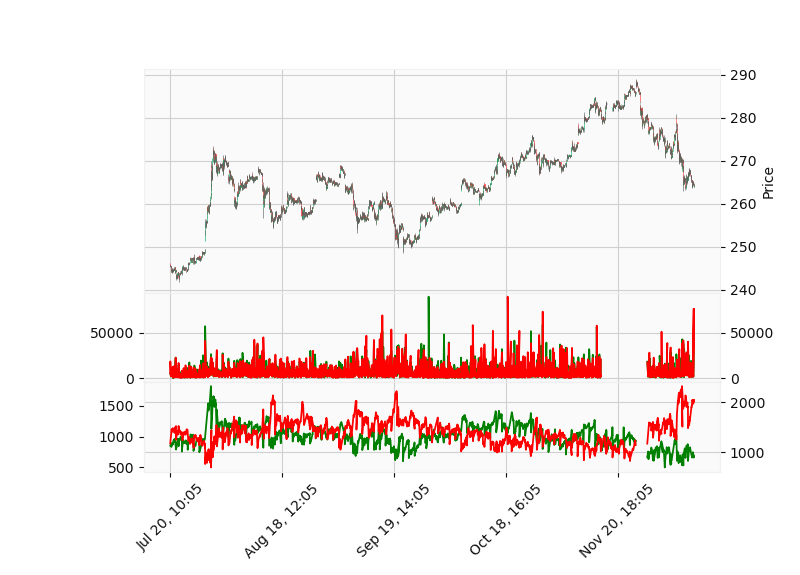

In [12]:
#создадим график
graph = Graph(superCandles)
#добавим вывод на сам график
graph.add_marker({'df':superCandles["pr_vwap"],'type':'scatter','color':'black','marker':'*'})

#добавим панели для статистических метрик Algopack
graph.add_panel({'df':superCandles["levels_b"],'color':'green','panel':2})
graph.add_panel({'df':superCandles["levels_s"],'color':'red','panel':2})
graph.add_panel({'df':superCandles["cancel_orders_b"],'color':'green','panel':1})
graph.add_panel({'df':superCandles["cancel_orders_s"],'color':'red','panel':1})
graph.add_panel({'df':superCandles["disb"],'color':'blue','panel':3})
%matplotlib notebook
f , a = graph.plot()

Фоновый планировшик задач, загрузка и обновление Dataframe содержащий SuperCandels, дабы избежать лишних запросов к сервису биржи, устанавливаем расписание. Функция promt запускаеться каждые 5 минут по рабочим дням начиная с 10 до 18:55 часов. Бесконечный цикл While необходим, при запуске планировщика в отдельном процесссе. В jupyter-notebook он не обязателен

In [ ]:
import time
from apscheduler.schedulers.background import BackgroundScheduler
from datetime import datetime
# Создает ФОНОВЫЙ планировщик
scheduler = BackgroundScheduler()
global superCandles
# функция - задание
def prompt():
    global superCandles
    time.sleep(20)
    deltaDay = timedelta(days=1)
    current_dateTime = datetime.now()
    start_data_str = (current_dateTime - deltaDay).strftime('%Y-%m-%d')
    end_data_str = current_dateTime.strftime('%Y-%m-%d')
    sc , _ = getSuperCandles(ticker,start_data_str,end_data_str)
    df = sc.loc[max(superCandles.index):][1:]
    if len(df) > 0:
        superCandles = pd.concat([superCandles,df])
    else:
        pass
    print(f"Обновление... {str(datetime.fromtimestamp(time.time()))} последняя точка {max(superCandles.index)}")
 
scheduler.add_job(prompt, 'cron', day_of_week='0-5', hour='10-18', minute='*/5')
scheduler.start()
while True:
    time.sleep(1)